<a href="https://colab.research.google.com/github/bonitr02/sqlite_database_operations/blob/main/hha504_assgn3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load packages

In [123]:
! pip install sqlalchemy
from sqlalchemy import create_engine
import sqlite3
import pandas as pd
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Hospital Database 1: Mount Sinai Queens

## Import data Hospital 1

In [ ]:
df = pd.read_csv('/content/131624096_mount-sinai-queens_chargemaster.csv')

<ipython-input-30-00c9927208ca>:1: DtypeWarning: Columns (9,10,12,13,14,15,17,19,20,21,22,23,24,27,28,29,31,33,34,35,36,38,41,43,45,47,48,49,50,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/131624096_mount-sinai-queens_chargemaster.csv')


In [ ]:
df.shape
#114893 rows and 55 columns

(114893, 55)

In [ ]:
df.head(10)

,CHARGE CODE,CHARGE DESC,ALTERNATE DESCRIPTION,DEPARTMENT CODE,DEPARTMENT NAME,EFFECTIVE DATE,RATE CHARGED,TP RATE (340B),GENERAL CPT4 CODE,GENERAL MODIFER 1,...,BC IP MODIFIER2 EFF DATE,BC OP REV CODE,BC OP HCPCS CODE,BC OP HCPCS EFF DATE,BC OP MODIFIER1,BC OP MODIFIER1 EFF DATE,BC OP MODIFIER2,BC OP MODIFIER2 EFF DATE,REVENUE CODE INPATIENT,REVENUE CODE OUTPATIENT
0,10300300,NON ESRD HEMO INPT UNIT,NON ESRD HEMO INPT UNIT,103,DIALYSIS,12/1/18,2150.0,0.0,90935,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,801.0
1,10300500,NON ESRD HEMO ED IN DIALYS UNI,NON ESRD HEMO ED IN DIALYS UNI,103,DIALYSIS,12/1/18,1500.0,0.0,90935,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,821.0,821.0
2,10300600,INPT CAPD TREATMENT,INPT CAPD TREATMENT,103,DIALYSIS,1/1/19,1150.0,0.0,90945,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,803.0,803.0
3,10300700,ESRD HEMO ED IN DIALYS UNIT,ESRD HEMO ED IN DIALYS UNIT,103,DIALYSIS,12/1/18,1500.0,0.0,G0257,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,821.0,821.0
4,10300800,ESRD HEMO INPT UNIT,ESRD HEMO INPT UNIT,103,DIALYSIS,12/1/18,1700.0,0.0,90935,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,801.0
5,10301000,ESRD HEMO INPT DIALYSIS UNIT,ESRD HEMO INPT DIALYSIS UNIT,103,DIALYSIS,12/1/18,1500.0,0.0,90935,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,801.0
6,10303200,CCPD CYCLER INPT,CCPD CYCLER INPT,103,DIALYSIS,1/1/19,1150.0,0.0,90945,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,804.0,804.0
7,10303400,NONESRD ULTRAFLTR IP DIALY UNI,NONESRD ULTRAFLTR IP DIALY UNI,103,DIALYSIS,12/1/18,1150.0,0.0,90945,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,881.0,881.0
8,10304600,ESRD ULTRAFLTR INPT UNIT,ESRD ULTRAFLTR INPT UNIT,103,DIALYSIS,1/1/19,1150.0,0.0,90945,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,881.0,881.0
9,10304700,ESRD ULTRAFLTR IP DIALYSIS UNI,ESRD ULTRAFLTR IP DIALYSIS UNI,103,DIALYSIS,12/1/18,1150.0,0.0,90945,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,881.0,881.0


In [ ]:
df.columns

## Data cleaning Hospital 1



In [ ]:
# Drop empty columns
df.dropna(how='all', axis=1, inplace=True)
print(df)

#Results in 114893 rows and 48 columns

In [ ]:
# Check for missing values in a column
print(df.isnull().sum())
# Results in only a few columns not missing values: CHARGE CODE, CHARGE DESC, ALTERNATE DESCRIPTION, DEPARTMENT CODE, DEPARTMENT NAME, EFFECTIVE DATE, RATE CHARGED, TP RATE (340B), REVENUE CODE INPATIENT, REVENUE CODE OUTPATIENT

In [ ]:
df.drop_duplicates(inplace=True)
# No duplicate rows identified

In [ ]:
#Rename columns
newDF=df.rename(columns={'CHARGE CODE': 'CHARGEcode', 'CHARGE DESC':'CHARGEdesc', 'ALTERNATE DESCRIPTION': 'ALTdesc', 'DEPARTMENT CODE':'DEPTcode', 'DEPARTMENT NAME':'DEPTname', 'EFFECTIVE DATE':'EFFECTIVEdate', 'RATE CHARGED':'RATEcharged', "TP RATE (340B)":'TP_RATE_340B', 'REVENUE CODE INPATIENT':'REVENUEcodeINPT', 'REVENUE CODE OUTPATIENT':'REVENUEcodeOPT'})

In [ ]:
print(newDF)

In [ ]:
df_msq=newDF[['CHARGEcode','CHARGEdesc','ALTdesc','DEPTcode','DEPTname','EFFECTIVEdate','RATEcharged','REVENUEcodeINPT','REVENUEcodeOPT']]

In [ ]:
df_msq.to_csv('/content/cleaned_mount-sinai-queens_chargemaster.csv')

## Exploratory Analysis Hospital 1



#### Observations: A lot of missing columns and values; created new dataframe with clean data to remove null values

In [ ]:
df_msq.dtypes

CHARGEcode          object
CHARGEdesc          object
ALTdesc             object
DEPTcode            object
DEPTname            object
EFFECTIVEdate       object
RATEcharged        float64
REVENUEcodeINPT     object
REVENUEcodeOPT      object
dtype: object

In [ ]:
# Convert columns to strings
df_msq['CHARGEcode'] = df_msq['CHARGEcode'].apply(str)
df_msq['DEPTcode'] = df_msq['DEPTcode'].apply(str)
df_msq['REVENUEcodeINPT'] = df_msq['REVENUEcodeINPT'].apply(str)
df_msq['REVENUEcodeOPT'] = df_msq['REVENUEcodeOPT'].apply(str)

In [ ]:
df_msq.describe()

,RATEcharged
count,114893.000000
mean,2051.366813
std,4404.024927
min,0.000000
25%,164.630000
50%,636.180000
75%,2226.000000
max,318000.000000


In [ ]:
df_msq['CHARGEcode'].value_counts()

10300300    1
70019617    1
70019454    1
70019453    1
70019452    1
           ..
50024335    1
50024334    1
50024333    1
50024332    1
99899993    1
Name: CHARGEcode, Length: 114893, dtype: int64

In [ ]:
df_msq['CHARGEdesc'].value_counts()

TIBIAL INSERT W SCREW             53
CATH PTA 142CM MARVERCK VARSZ     49
STEM 195MM STEM REST MOD CONI     49
ERYTHROPOIETIN RECOMBINANT INJ    45
SPHINCTER   4.9F   .035/450       42
                                  ..
CATH  ANGIO 14X2 5.8FR 75CM        1
CATH ANGIO 16X2 5.8FR 120CM        1
EXTRACTOR STONE RETR BLLN 8.5      1
EXTRACTOR RETRIEV BLLN 12-15M      1
LEFT WITHOUT BEEN SEEN/ERRONEO     1
Name: CHARGEdesc, Length: 76586, dtype: int64

In [ ]:
df_msq['ALTdesc'].value_counts()

TIBIAL INSERT W SCREW             53
STEM 195MM STEM REST MOD CONI     49
CATH PTA 142CM MARVERCK VARSZ     49
ERYTHROPOIETIN RECOMBINANT INJ    45
SPHINCTER   4.9F   .035/450       42
                                  ..
GRAFT HEMA MICROVEL22 X30CM        1
BALLOON  PULMONARY 8.5MM           1
CATH  CONTRA ANGIOG 5 FR 65        1
CATH ULTRA BLLN DIL 3X2  75CM      1
LEFT WITHOUT BEEN SEEN/ERRONEO     1
Name: ALTdesc, Length: 76591, dtype: int64

In [ ]:
df_msq['DEPTcode'].value_counts()

700    47056
500    31710
184     7320
800     6480
415     4452
       ...  
162        2
626        1
310        1
994        1
998        1
Name: DEPTcode, Length: 75, dtype: int64

In [ ]:
df_msq['DEPTname'].value_counts()

OR OPTIME SUPPLIES 700      47056
OR SUPPLIES A00             31710
PHARMACY                    11772
OR OPTIME SUPPLIES 800       6480
OR SUPPLIES X21- IR          4028
                            ...  
AMBULATORY SERV. TESTING        2
AMBULATORY SURGERY              2
BALANCE FORWARD                 1
ROOM & BOARD ICU                1
MISCELLANEOUS                   1
Name: DEPTname, Length: 71, dtype: int64

In [ ]:
df_msq['RATEcharged'].value_counts()

1.00       952
300.00     717
0.00       677
250.00     612
500.00     573
          ... 
405.10       1
455.54       1
414.20       1
2582.00      1
220.64       1
Name: RATEcharged, Length: 15914, dtype: int64

In [ ]:
df_msq['REVENUEcodeINPT'].value_counts()

278.0    82182
270.0     7830
250.0     7549
276.0     3221
636.0     2899
         ...  
381.0        1
389.0        1
385.0        1
303.0        1
271.0        1
Name: REVENUEcodeINPT, Length: 124, dtype: int64

In [ ]:
df_msq['REVENUEcodeOPT'].value_counts()

278.0    82182
270.0     7830
250.0     7257
276.0     3221
636.0     3191
         ...  
381.0        1
389.0        1
385.0        1
303.0        1
271.0        1
Name: REVENUEcodeOPT, Length: 124, dtype: int64

In [ ]:
# Data distribution

# Calculate mean, median, and mode
mean= df_msq['RATEcharged'].mean()
median = df_msq['RATEcharged'].median()
mode = df_msq['RATEcharged'].mode().iloc[0]
print("Mean is:", mean)
print("Median is:", median)
print("Mode is: ", mode)
# Calculate range
range  = df_msq['RATEcharged'].max() - df_msq['RATEcharged'].min()
print("Range is:", range)
# Calculate variance and standard deviation
variance = np.var(df_msq['RATEcharged'])
print("Variance is: ",variance)
std_dev = np.std(df_msq['RATEcharged'])
print("Standard Deviation is:", std_dev)

Mean is: 2051.366812512512
Median is: 636.18
Mode is:  1.0
Range is: 318000.0
Variance is:  19395266.741329383
Standard Deviation is: 4404.005760819277


In [ ]:
# Remove outliers by only allowing data within 3 standard deviations
df_cleaned = df_msq[df_msq['RATEcharged']<= std_dev*3]

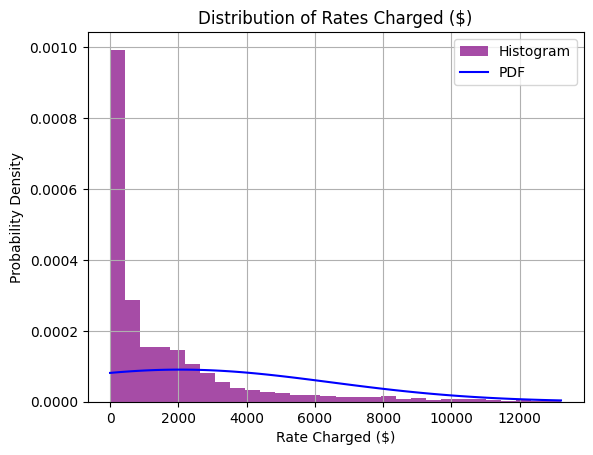

In [ ]:
# Create a histogram
plt.hist(df_cleaned['RATEcharged'], bins=30, density=True, alpha=0.7, color='purple', label='Histogram')

# Create a probability density function (PDF) curve
x = np.linspace(min(df_cleaned['RATEcharged']), max(df_cleaned['RATEcharged']),100)
pdf = (1/(std_dev * np.sqrt(2*np.pi))) * np.exp(-(x - mean)**2 / (2*std_dev**2))
plt.plot(x, pdf, color='blue', label='PDF')

plt.title('Distribution of Rates Charged ($)')
plt.xlabel('Rate Charged ($)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df_cleaned.to_csv('/content/outliers_rem_cleaned_mount-sinai-queens_chargemaster.csv')

# Hospital Database 2: New York Presbyterian

## Import data Hospital 2

In [3]:
df2 = pd.read_json('/content/133957095_NewYorkPresbyterianHospital_standardcharges.json')

In [4]:
df2.shape
#6193 rows and 47 columns

(6193, 47)

In [5]:
df2.head(10)

,Code (CPT/DRG),Description,Rev Code,Inpatient/Outpatient,Gross Charges,Discounted Cash Price,Aetna,Cigna,Empire Blue Cross Blue Shield,Emblem Health,...,Consumer Health Network,Devon,Equian,First Health,Magnacare,Multiplan/Beechstreet/PHCS,QHM,Worldwide,Minimum Negotiated Charge,Maximum Negotiated Charge
0,96360,HC IV INFUSION HYDRATION INITIAL 31 MIN-1HR,0260,Inpatient/Outpatient,866.0,866.0,641.706,494.486,640.84,1388.424,...,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,253.04825,1388.424000
1,96361,HC IV INFUSION HYDRATION FLUIDS ADDL HR,0260,Inpatient/Outpatient,358.0,358.0,265.278,204.418,264.92,1305.112,...,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,51.90325,1990.891341
2,96365,HC IV INFUSION FOR THER/PROPH/DIAG INITIAL UP ...,0260,Inpatient/Outpatient,1397.0,1397.0,1035.177,797.687,1033.78,1475.508,...,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,253.04825,1475.508000
3,96367,HC IV INF THER/PROPH/DIAG ADDL SEQ NEW DRUG UP...,0260,Inpatient/Outpatient,480.0,480.0,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,82.65075,1325.120000
4,96368,HC IV INFUSION FOR THER/PROPH/DIAG CONCURRENT,0260,Inpatient/Outpatient,480.0,480.0,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,156.98280,1325.120000
5,96369,HC NON-CHEMO SC INFUSION 1 HR,0260,Inpatient/Outpatient,780.0,780.0,577.98,445.38,577.2,1374.32,...,354.432,354.432,354.432,354.432,354.432,354.432,354.432,354.432,253.04825,1374.320000
6,96370,HC NON-CHEMO SC INFUSION EACH ADDL HR,0260,Inpatient/Outpatient,480.0,480.0,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,51.90325,1990.891341
7,96375,HC THERAPEUTIC/PROPH/DIAG INJ IV PUSH ADDL SEQ,0260,Inpatient/Outpatient,602.0,602.0,446.082,343.742,445.48,1345.128,...,273.5488,273.5488,273.5488,273.5488,273.5488,273.5488,273.5488,273.5488,51.90325,1345.128000
8,96376,HC THERAPEUTIC/PROPH/DIAG INJ IV PUSH SAME,0260,Inpatient/Outpatient,357.0,357.0,264.537,203.847,264.18,1304.948,...,162.2208,162.2208,162.2208,162.2208,162.2208,162.2208,162.2208,162.2208,162.22080,1304.948000
9,96377,HC APPLICATION OF BODY INJECTOR,0260,Inpatient/Outpatient,510.0,510.0,377.91,291.21,377.4,1330.04,...,231.744,231.744,231.744,231.744,231.744,231.744,231.744,231.744,51.90325,1330.040000


In [6]:
df2.columns

Index(['Code (CPT/DRG)', 'Description', 'Rev Code', 'Inpatient/Outpatient',
       'Gross Charges', 'Discounted Cash Price', 'Aetna', 'Cigna',
       'Empire Blue Cross Blue Shield', 'Emblem Health', 'United Health Group',
       'Aetna Medicare', 'AgeWell Medicare', 'Emblem Medicare',
       'Empire Medicare', 'Fidelis Medicare', 'Healthfirst Medicare',
       'UHC Community Plan/United Medicare', 'VNS Medicare',
       'WellCare Medicare', '1199', 'Affinity Molina Essential',
       'Affinity Molina Medicaid/CHP', 'Amida Care Medicaid',
       'Emblem Medicaid/CHP', 'Empire Healthplus Essential',
       'Empire Healthplus Exchange', 'Empire Healthplus Medicaid/CHP',
       'Fidelis Essential/Exchange', 'Fidelis Medicaid/CHP',
       'Healthfirst Essential/Exchange', 'Healthfirst Medicaid/CHP',
       'MVP Medicaid/CHP', 'MVP Essential', 'United Community Plan Essential',
       'United Community Plan Medicaid', 'VNS Medicaid',
       'Consumer Health Network', 'Devon', 'Equian', 'Fir

## Data cleaning Hospital 2



In [ ]:
# Drop empty columns
df2.dropna(how='all', axis=1, inplace=True)
print(df2)

#No empty columns dropped

In [ ]:
# Check for missing values in a column
print(df2.isnull().sum())
# Results in only Minimum Negotiated Charge and Maximum Negotiated Charge resulting in 281 missing values each

In [11]:
df2.drop_duplicates(inplace=True)
# No duplicate rows identified

In [100]:
#Rename columns
df2_clean=df2.rename(columns={'Code (CPT/DRG)':'CPTDRGCode', 'Inpatient/Outpatient':'Inpt_Oupt','Affinity Molina Medicaid/CHP':'Affinity_Molina_Medicaid_CHP','UHC Community Plan/United Medicare':"UHC_CommPlan_Medicare",'Emblem Medicaid/CHP':'Emblem_Medicaid_CHP','Empire Medicaid/CHP':'Empire_medicaid_CHP','Empire Healthplus Medicaid/CHP':'Empire_Healthplus_MedicaidCHP','Fidelis Essential/Exchange':'Fidelis_Essential_Exchange','Fidelis Medicaid/CHP':'Fidelis_Medicaid_CHP','Healthfirst Essential/Exchange':'Healthfirst_Essential_Exchange','Healthfirst Medicaid/CHP':'Healthfirst_Medicaid_CHP','MVP Medicaid/CHP':'MVP_Medicaid_CHP','Multiplan/Beechstreet/PHCS':'Multiplan_Beechstreet_PHCS'})

## Exploratory Analysis Hospital 2



#### Observations: Very few missing values

In [138]:
df2_clean.dtypes

CPTDRGCode                          object
Description                         object
Rev Code                            object
Inpt_Oupt                           object
Gross Charges                      float64
Discounted Cash Price              float64
Aetna                               object
Cigna                               object
Empire Blue Cross Blue Shield       object
Emblem Health                       object
United Health Group                 object
Aetna Medicare                      object
AgeWell Medicare                    object
Emblem Medicare                     object
Empire Medicare                     object
Fidelis Medicare                    object
Healthfirst Medicare                object
UHC_CommPlan_Medicare               object
VNS Medicare                        object
WellCare Medicare                   object
1199                                object
Affinity Molina Essential           object
Affinity_Molina_Medicaid_CHP        object
Amida Care 

In [33]:
df2_clean.describe()

,Gross Charges,Discounted Cash Price,Minimum Negotiated Charge,Maximum Negotiated Charge
count,6.193000e+03,6.193000e+03,5912.000000,5.912000e+03
mean,3.385988e+04,3.385988e+04,2249.918880,2.390277e+04
std,1.062409e+05,1.062409e+05,6015.717204,7.136503e+04
min,1.000000e+00,1.000000e+00,0.454400,1.608000e+00
25%,5.970000e+02,5.970000e+02,122.228437,6.380010e+02
50%,3.925000e+03,3.925000e+03,431.142905,4.086731e+03
75%,3.033600e+04,3.033600e+04,2107.000000,1.925640e+04
max,2.538980e+06,2.538980e+06,204861.126000,1.713460e+06


In [71]:
df2_clean['CPTDRGCode'].value_counts()

96360    1
D0705    1
D0431    1
D0425    1
D0423    1
        ..
29874    1
29873    1
29871    1
29870    1
989      1
Name: CPTDRGCode, Length: 6193, dtype: int64

In [72]:
df2_clean['Description'].value_counts()

KNEE ARTHROSCOPY/SURGERY                                                         16
REPAIR EYELID DEFECT                                                             12
CYSTOSCOPY AND TREATMENT                                                         12
TREAT HUMERUS FRACTURE                                                            9
SHOULDER ARTHROSCOPY/SURGERY                                                      7
                                                                                 ..
AMPUTATION TOE METATARSAL                                                         1
AMPUTATION THRU METATARSAL                                                        1
AMPUTATION OF MIDFOOT                                                             1
REVISION OF FOOT BONES                                                            1
NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIPAL DIAGNOSIS WITHOUT CC/MCC     1
Name: Description, Length: 5925, dtype: int64

In [73]:
df2_clean['Rev Code'].value_counts()

0360        1955
0512         737
Multiple     723
0510         421
0301         341
            ... 
0770           1
0204           1
0616           1
0110           1
0801           1
Name: Rev Code, Length: 150, dtype: int64

In [74]:
df2_clean['Inpt_Oupt'].value_counts()

Inpatient/Outpatient    5470
Inpatient                723
Name: Inpt_Oupt, dtype: int64

In [75]:
df2_clean['Aetna'].value_counts()

9144                           1652
Not separately payable         1249
Included in Service Package     234
2846                            108
17784                            75
                               ... 
7747.896                          1
6860.178                          1
1469.403                          1
493.506                           1
38116.5824                        1
Name: Aetna, Length: 2111, dtype: int64

In [76]:
df2_clean['Cigna'].value_counts()

7496                           1827
Not separately payable         1178
Included in Service Package     234
559                              69
232                              48
                               ... 
1257.16                           1
997.248                           1
797.968                           1
2245.504                          1
43473.507792                      1
Name: Cigna, Length: 1865, dtype: int64

In [77]:
df2_clean['Empire Blue Cross Blue Shield'].value_counts()

11924                          530
12938                          411
Not separately payable         291
9829                           254
Included in Service Package    250
                              ... 
723.4425                         1
1529.7876                        1
1476.6917                        1
2045.1046                        1
44463.77208                      1
Name: Empire Blue Cross Blue Shield, Length: 2540, dtype: int64

In [78]:
df2_clean['Emblem Health'].value_counts()

9474.4                         1893
Not separately payable         1220
Included in Service Package     234
Patient responsibility           47
98.088                           23
                               ... 
1423.738436                       1
3662.753644                       1
40064.495764                      1
782.28                            1
50601.70336                       1
Name: Emblem Health, Length: 2253, dtype: int64

In [79]:
df2_clean['United Health Group'].value_counts()

6002                           425
5445                           308
7522                           276
Included in Service Package    235
9670                           222
                              ... 
555.3388                         1
33119.2                          1
37455.2                          1
41539.2                          1
45239.1888                       1
Name: United Health Group, Length: 2564, dtype: int64

In [80]:
df2_clean['Aetna Medicare'].value_counts()

Not separately payable         1209
Included in Service Package     234
3646.4085                       137
8102.92175                      129
130.928                         107
                               ... 
18.97                             1
16.18                             1
17.12                             1
4.38                              1
10642.8820036438                  1
Name: Aetna Medicare, Length: 1531, dtype: int64

In [81]:
df2_clean['AgeWell Medicare'].value_counts()

Not separately payable         1209
Included in Service Package     234
4558.010625                     137
10128.6521875                   129
163.66                          107
                               ... 
23.7125                           1
20.225                            1
21.4                              1
5.475                             1
13303.6025045547                  1
Name: AgeWell Medicare, Length: 1532, dtype: int64

In [82]:
df2_clean['Emblem Medicare'].value_counts()

Not separately payable         1209
Included in Service Package     234
3646.4085                       137
8102.92175                      129
130.928                         107
                               ... 
18.97                             1
16.18                             1
17.12                             1
4.38                              1
10642.8820036438                  1
Name: Emblem Medicare, Length: 1531, dtype: int64

In [83]:
df2_clean['Empire Medicare'].value_counts()

Not separately payable         1209
Included in Service Package     234
3646.4085                       137
8102.92175                      129
130.928                         107
                               ... 
18.97                             1
16.18                             1
17.12                             1
4.38                              1
10642.8820036438                  1
Name: Empire Medicare, Length: 1530, dtype: int64

In [84]:
df2_clean['Fidelis Medicare'].value_counts()

Not separately payable         1209
Included in Service Package     234
3646.4085                       137
8102.92175                      129
130.928                         107
                               ... 
18.97                             1
16.18                             1
17.12                             1
4.38                              1
10962.1684637531                  1
Name: Fidelis Medicare, Length: 1531, dtype: int64

In [85]:
df2_clean['Healthfirst Medicare'].value_counts()

Not separately payable         1209
Included in Service Package     234
3755.800755                     137
8346.0094025                    129
134.85584                       107
                               ... 
19.5391                           1
16.665399999999998                1
17.6336                           1
4.5114                            1
10962.1684637531                  1
Name: Healthfirst Medicare, Length: 1532, dtype: int64

In [86]:
df2_clean['UHC_CommPlan_Medicare'].value_counts()

Not separately payable         1209
Included in Service Package     234
3682.872585                     137
8183.9509675                    129
132.23728                       107
                               ... 
126.1187                          1
92.5766                           1
263.3979                          1
209.5346                          1
10749.3108236802                  1
Name: UHC_CommPlan_Medicare, Length: 1529, dtype: int64

In [87]:
df2_clean['VNS Medicare'].value_counts()

Not separately payable         1209
Included in Service Package     234
3755.800755                     137
8346.0094025                    129
134.85584                       107
                               ... 
128.3792                          1
128.6161                          1
94.4098                           1
268.6137                          1
10962.1684637531                  1
Name: VNS Medicare, Length: 1531, dtype: int64

In [88]:
df2_clean['WellCare Medicare'].value_counts()

Not separately payable         1209
Included in Service Package     234
3774.0327975                    137
8386.52401125                   129
135.51048                       107
                               ... 
19.63395                          1
16.7463                           1
17.7192                           1
4.5333                            1
11015.3828737713                  1
Name: WellCare Medicare, Length: 1532, dtype: int64

In [89]:
df2_clean['1199'].value_counts()

2107                           375
2412                           343
1564                           236
Included in Service Package    235
2965                           189
                              ... 
601                              1
202.5                            1
197                              1
389                              1
17670.3696                       1
Name: 1199, Length: 2230, dtype: int64

In [90]:
df2_clean['Affinity Molina Essential'].value_counts()

Not separately payable         446
Included in Service Package    234
190.4488947622                 118
1307.4003956636                 99
242.2919270951                  94
                              ... 
72216.7658361309                 1
38214.5105                       1
73221.8380676645                 1
42207.9497086591                 1
26478.2326888993                 1
Name: Affinity Molina Essential, Length: 1139, dtype: int64

In [91]:
df2_clean['Affinity_Molina_Medicaid_CHP'].value_counts()

Not separately payable         446
Included in Service Package    234
84.6439532276                  118
581.0668425172                  99
107.6853009311                  94
                              ... 
31339.3512119059                 1
16583.6555                       1
31775.5146331374                 1
18316.6574207388                 1
11490.5538083903                 1
Name: Affinity_Molina_Medicaid_CHP, Length: 1139, dtype: int64

In [92]:
df2_clean['Amida Care Medicaid'].value_counts()

Not separately payable         446
Included in Service Package    234
97.3405462118                  118
668.2268688947                  99
123.8380960708                  94
                              ... 
31339.3512119059                 1
16583.6555                       1
31775.5146331374                 1
18316.6574207388                 1
11490.5538083903                 1
Name: Amida Care Medicaid, Length: 1139, dtype: int64

In [93]:
df2_clean['Emblem_Medicaid_CHP'].value_counts()

Not separately payable         446
Included in Service Package    234
97.3405462118                  118
668.2268688947                  99
123.8380960708                  94
                              ... 
31339.3512119059                 1
16583.6555                       1
31775.5146331374                 1
18316.6574207388                 1
11490.5538083903                 1
Name: Emblem_Medicaid_CHP, Length: 1139, dtype: int64

In [94]:
df2_clean['Empire Healthplus Essential'].value_counts()

Not separately payable         446
Included in Service Package    234
190.4488947622                 118
1307.4003956636                 99
242.2919270951                  94
                              ... 
61316.1219363376                 1
32446.2825                       1
62169.4851517906                 1
35836.9384318803                 1
22481.5183207636                 1
Name: Empire Healthplus Essential, Length: 1139, dtype: int64

In [95]:
df2_clean['Empire Healthplus Exchange'].value_counts()

Not separately payable         446
Included in Service Package    234
211.6098830691                 118
1452.6671062929                 99
269.2132523279                  94
                              ... 
68129.0243737084                 1
36051.425                        1
69077.2057242118                 1
39818.820479867                  1
24979.4648008484                 1
Name: Empire Healthplus Exchange, Length: 1139, dtype: int64

In [96]:
df2_clean['Empire_Healthplus_MedicaidCHP'].value_counts()

Not separately payable         446
Included in Service Package    234
84.6439532276                  118
581.0668425172                  99
107.6853009311                  94
                              ... 
27251.6097494834                 1
14420.57                         1
27630.8822896847                 1
15927.5281919468                 1
9991.7859203394                  1
Name: Empire_Healthplus_MedicaidCHP, Length: 1139, dtype: int64

In [97]:
df2_clean['Fidelis_Essential_Exchange'].value_counts()

Not separately payable         446
Included in Service Package    234
211.6098830691                 118
1452.6671062929                 99
269.2132523279                  94
                              ... 
68129.0243737084                 1
36051.425                        1
69077.2057242118                 1
39818.820479867                  1
24979.4648008484                 1
Name: Fidelis_Essential_Exchange, Length: 1139, dtype: int64

In [98]:
df2_clean['Fidelis_Medicaid_CHP'].value_counts()

Not separately payable         446
Included in Service Package    234
84.6439532276                  118
581.0668425172                  99
107.6853009311                  94
                              ... 
31339.3512119059                 1
16583.6555                       1
31775.5146331374                 1
18316.6574207388                 1
11490.5538083903                 1
Name: Fidelis_Medicaid_CHP, Length: 1139, dtype: int64

In [103]:
df2_clean['Healthfirst_Essential_Exchange'].value_counts()

Not separately payable         446
Included in Service Package    234
See Tab A                       50
Patient responsibility          47
73.2                            28
                              ... 
37180.2                          1
27329.4                          1
38318.4                          1
32698.2                          1
5995.0715522036                  1
Name: Healthfirst_Essential_Exchange, Length: 3844, dtype: int64

In [69]:
df2_clean['Healthfirst_Medicaid_CHP'].value_counts()

Not separately payable         446
Included in Service Package    234
88.876150889                   118
610.120184643                   99
113.0695659777                  94
                              ... 
28614.1902369575                 1
15141.5985                       1
29012.426404169                  1
16723.9046015442                 1
10491.3752163563                 1
Name: Healthfirst_Medicaid_CHP, Length: 1139, dtype: int64

In [68]:
df2_clean['MVP_Medicaid_CHP'].value_counts()

Not separately payable         446
Included in Service Package    234
84.6439532276                  118
581.0668425172                  99
107.6853009311                  94
                              ... 
31339.3512119059                 1
16583.6555                       1
31775.5146331374                 1
18316.6574207388                 1
11490.5538083903                 1
Name: MVP_Medicaid_CHP, Length: 1139, dtype: int64

In [67]:
df2_clean['MVP Essential'].value_counts()

Not separately payable         446
Included in Service Package    234
101.5727438732                 118
697.2802110206                  99
129.2223611174                  94
                              ... 
32701.93169938                   1
17304.684                        1
33157.0587476217                 1
19113.0338303362                 1
11990.1431044072                 1
Name: MVP Essential, Length: 1139, dtype: int64

In [66]:
df2_clean['United Community Plan Essential'].value_counts()

Not separately payable         446
Included in Service Package    234
118.5015345187                 118
813.493579524                   99
150.7594213036                  94
                              ... 
38152.2536492767                 1
20188.798                        1
38683.2352055586                 1
22298.5394687255                 1
13988.5002884751                 1
Name: United Community Plan Essential, Length: 1139, dtype: int64

In [65]:
df2_clean['United Community Plan Medicaid'].value_counts()

Not separately payable         446
Included in Service Package    234
84.6439532276                  118
581.0668425172                  99
107.6853009311                  94
                              ... 
27251.6097494834                 1
14420.57                         1
27630.8822896847                 1
15927.5281919468                 1
9991.7859203394                  1
Name: United Community Plan Medicaid, Length: 1139, dtype: int64

In [63]:
df2_clean['VNS Medicaid'].value_counts()

Not separately payable         446
Included in Service Package    234
84.6439532276                  118
581.0668425172                  99
107.6853009311                  94
                              ... 
31339.3512119059                 1
16583.6555                       1
31775.5146331374                 1
18316.6574207388                 1
11490.5538083903                 1
Name: VNS Medicaid, Length: 1139, dtype: int64

In [62]:
df2_clean['Consumer Health Network'].value_counts()

Included in Service Package    234
Patient responsibility          47
55.4368                         32
1516.3328                       29
1160.0832                       27
                              ... 
9940                             1
9591.4752                        1
6383.8656                        1
12465.5552                       1
35025.8969869067                 1
Name: Consumer Health Network, Length: 3988, dtype: int64

In [61]:
df2_clean['Devon'].value_counts()

Included in Service Package    234
Patient responsibility          47
55.4368                         32
1516.3328                       29
1160.0832                       27
                              ... 
9940                             1
9591.4752                        1
6383.8656                        1
12465.5552                       1
35025.8969869067                 1
Name: Devon, Length: 3988, dtype: int64

In [60]:
df2_clean['Equian'].value_counts()

Included in Service Package    234
Patient responsibility          47
55.4368                         32
1516.3328                       29
1160.0832                       27
                              ... 
9940                             1
9591.4752                        1
6383.8656                        1
12465.5552                       1
35025.8969869067                 1
Name: Equian, Length: 3988, dtype: int64

In [59]:
df2_clean['First Health'].value_counts()

Included in Service Package    234
Patient responsibility          47
55.4368                         32
1516.3328                       29
1160.0832                       27
                              ... 
9940                             1
9591.4752                        1
6383.8656                        1
12465.5552                       1
35025.8969869067                 1
Name: First Health, Length: 3988, dtype: int64

In [58]:
df2_clean['Magnacare'].value_counts()

Included in Service Package    234
Patient responsibility          47
55.4368                         32
1516.3328                       29
1160.0832                       27
                              ... 
9940                             1
9591.4752                        1
6383.8656                        1
12465.5552                       1
35025.8969869067                 1
Name: Magnacare, Length: 3988, dtype: int64

In [57]:
df2_clean['Multiplan_Beechstreet_PHCS'].value_counts()

Included in Service Package    234
Patient responsibility          47
55.4368                         32
1516.3328                       29
1160.0832                       27
                              ... 
9940                             1
9591.4752                        1
6383.8656                        1
12465.5552                       1
35025.8969869067                 1
Name: Multiplan_Beechstreet_PHCS, Length: 3988, dtype: int64

In [56]:
df2_clean['QHM'].value_counts()

Included in Service Package    234
Patient responsibility          47
55.4368                         32
1516.3328                       29
1160.0832                       27
                              ... 
9940                             1
9591.4752                        1
6383.8656                        1
12465.5552                       1
35025.8969869067                 1
Name: QHM, Length: 3988, dtype: int64

In [55]:
df2_clean['Worldwide'].value_counts()

Included in Service Package    234
Patient responsibility          47
55.4368                         32
1516.3328                       29
1160.0832                       27
                              ... 
9940                             1
9591.4752                        1
6383.8656                        1
12465.5552                       1
35025.8969869067                 1
Name: Worldwide, Length: 3988, dtype: int64

In [150]:
# Data distribution

# Calculate mean, median, and mode
mean2= df2_clean[['Gross Charges','Discounted Cash Price','Minimum Negotiated Charge', 'Maximum Negotiated Charge']].mean()
median2 = df2_clean[['Gross Charges','Discounted Cash Price','Minimum Negotiated Charge', 'Maximum Negotiated Charge']].median()
mode2 = df2_clean[['Gross Charges','Discounted Cash Price','Minimum Negotiated Charge', 'Maximum Negotiated Charge']].mode().iloc[0]
print("Mean is:\n", mean2, '\n')
print("Median is:\n", median2, '\n')
print("Mode is:\n ", mode2, '\n')
# Calculate range
range2 = df2_clean[['Gross Charges','Discounted Cash Price','Minimum Negotiated Charge', 'Maximum Negotiated Charge']].max() - df2_clean[['Gross Charges','Discounted Cash Price','Minimum Negotiated Charge', 'Maximum Negotiated Charge']].min()
print("Range is:\n", range2, '\n')
# Calculate variance and standard deviation
variance2 = np.var(df2_clean[['Gross Charges','Discounted Cash Price','Minimum Negotiated Charge', 'Maximum Negotiated Charge']])
print("Variance is:\n",variance2, '\n')
std_dev2 = np.std(df2_clean[['Gross Charges','Discounted Cash Price','Minimum Negotiated Charge', 'Maximum Negotiated Charge']])
print("Standard Deviation is:\n", std_dev2)

Mean is:
 Gross Charges                33859.881200
Discounted Cash Price        33859.881200
Minimum Negotiated Charge     2249.918880
Maximum Negotiated Charge    23902.774243
dtype: float64 

Median is:
 Gross Charges                3925.000000
Discounted Cash Price        3925.000000
Minimum Negotiated Charge     431.142905
Maximum Negotiated Charge    4086.731300
dtype: float64 

Mode is:
  Gross Charges                  122.0
Discounted Cash Price          122.0
Minimum Negotiated Charge     2412.0
Maximum Negotiated Charge    11924.0
Name: 0, dtype: float64 

Range is:
 Gross Charges                2.538979e+06
Discounted Cash Price        2.538979e+06
Minimum Negotiated Charge    2.048607e+05
Maximum Negotiated Charge    1.713459e+06
dtype: float64 

Variance is:
 Gross Charges                1.128531e+10
Discounted Cash Price        1.128531e+10
Minimum Negotiated Charge    3.618273e+07
Maximum Negotiated Charge    5.092106e+09
dtype: float64 

Standard Deviation is:
 Gross Ch

In [126]:
# Remove outliers by only allowing data within 3 standard deviations
df2_clean_outliers = df2_clean[df2_clean[['Gross Charges','Discounted Cash Price','Minimum Negotiated Charge','Maximum Negotiated Charge']]<= std_dev2*3]

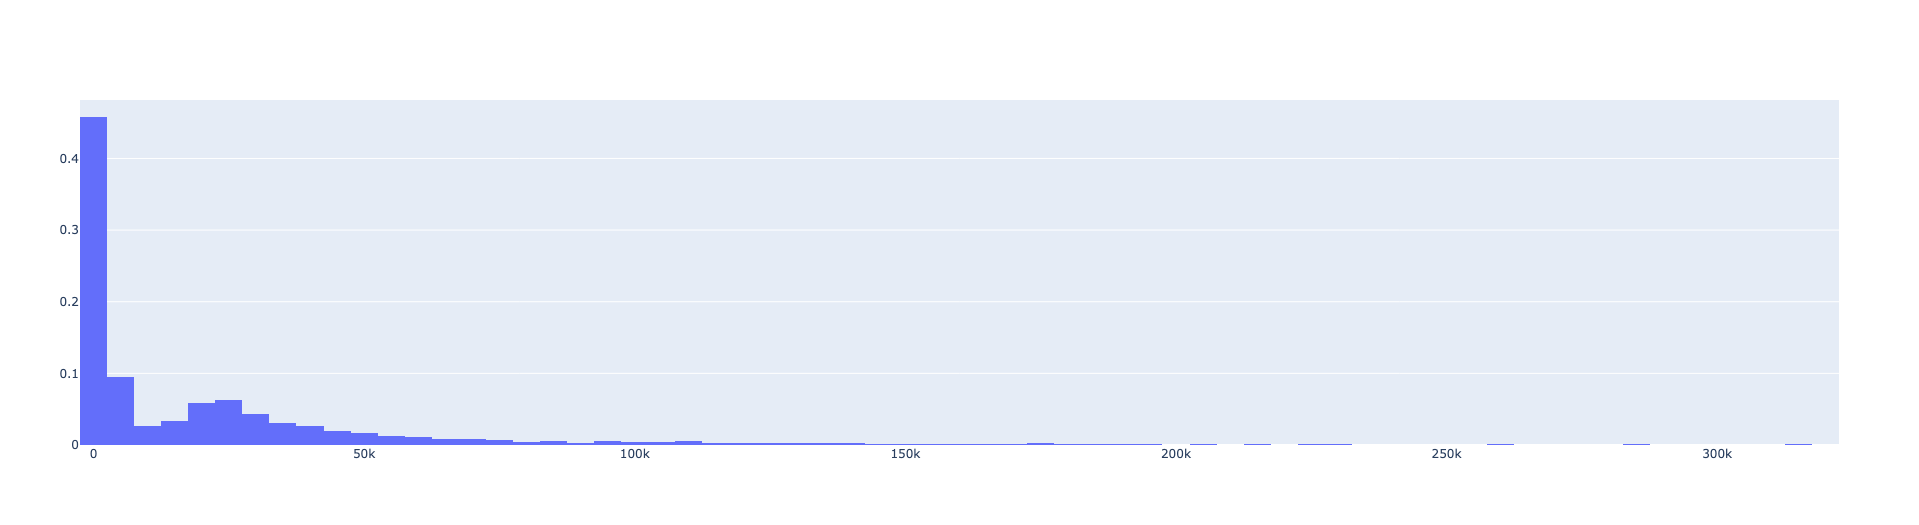

In [151]:
fig = go.Figure(data=[go.Histogram(x=df2_clean_outliers['Gross Charges'], histnorm='probability')])

from IPython import display
display.Image("/content/newplot.png")

In [128]:
fig = go.Figure(data=[go.Histogram(x=df2_clean_outliers['Discounted Cash Price'], histnorm='probability')])

fig.show()

In [130]:
fig = go.Figure(data=[go.Histogram(x=df2_clean_outliers['Minimum Negotiated Charge'], histnorm='probability')])

fig.show()

In [131]:
fig = go.Figure(data=[go.Histogram(x=df2_clean_outliers['Maximum Negotiated Charge'], histnorm='probability')])

fig.show()

In [132]:
df2_clean_outliers.to_csv('/content/newdb_NewYorkPresbyterianHospital_standardcharges.csv')

# SQLite Database Operations

In [135]:
conn = sqlite3.connect('health.db')
c = conn.cursor()

### Manual table creation

In [ ]:
c.execute('''
              CREATE TABLE msqCharges7
                    (
                      Charge_description text,
                      Department_name text,
                      Rate_Charged real,
                      PaidClaim real,
                      LostRevenue real
                    );
          ''')
conn.commit()

In [ ]:
c.execute('''

  SELECT name
  FROM sqlite_master
  WHERE type='table';
   ''')
print(c.fetchall())

[('msqCharges1',), ('msqCharges',), ('msqCharges2',), ('msqCharges3',), ('msqCharges4',), ('msqCharges5',), ('msqCharges5db',), ('msq_database',), ('msqCharges6',), ('msqCharges7',)]


In [ ]:
sql_query = '''
INSERT INTO msqCharges7
  (
  'Charge_description',
  'Department_name',
  'Rate_Charged',
  'PaidClaim',
  'LostRevenue'
)
values
  (
  'Mount Sinai Queens',
  'Outpatient Surgery',
   10000,
   5000,
   5000
);

'''
print(sql_query)


INSERT INTO msqCharges7
  (
  'Charge_description',
  'Department_name',
  'Rate_Charged',
  'PaidClaim',
  'LostRevenue'
)
values
  (
  'Mount Sinai Queens',
  'Outpatient Surgery',
   10000,
   5000,
   5000
);




In [ ]:
c.execute(sql_query)
conn.commit()

In [ ]:
sql_query_2 = '''

select *
from msqCharges7;

'''

c.execute(sql_query_2)
print(c.fetchall())

[('Mount Sinai Queens', 'Outpatient Surgery', 10000.0, 5000.0, 5000.0)]


In [ ]:
msqCharges7db = pd.read_sql('select * from msqCharges7;', conn)

In [ ]:
msqCharges7db.to_sql('msqCharges57db', conn, if_exists="replace")

1

In [ ]:
query = '''
select *
 from msqCharges7
;
 '''

response = pd.read_sql(query, conn)
response

,Charge_description,Department_name,Rate_Charged,PaidClaim,LostRevenue
0,Mount Sinai Queens,Outpatient Surgery,10000.0,5000.0,5000.0


### Automatic table creation

In [133]:
msq_database = pd.read_csv('/content/newdb_NewYorkPresbyterianHospital_standardcharges.csv')

In [136]:
msq_database.to_sql('msq_database', conn, if_exists='append', index=False)

6193

In [137]:
query = '''
select *
 from msq_database
;
 '''

response1 = pd.read_sql(query, conn)
response1

,Unnamed: 0,CPTDRGCode,Description,Rev Code,Inpt_Oupt,Gross Charges,Discounted Cash Price,Aetna,Cigna,Empire Blue Cross Blue Shield,...,Consumer Health Network,Devon,Equian,First Health,Magnacare,Multiplan_Beechstreet_PHCS,QHM,Worldwide,Minimum Negotiated Charge,Maximum Negotiated Charge
0,0,None,None,None,None,866.000000,866.000000,None,None,None,...,None,None,None,None,None,None,None,None,253.048250,1388.424000
1,1,None,None,None,None,358.000000,358.000000,None,None,None,...,None,None,None,None,None,None,None,None,51.903250,1990.891341
2,2,None,None,None,None,1397.000000,1397.000000,None,None,None,...,None,None,None,None,None,None,None,None,253.048250,1475.508000
3,3,None,None,None,None,480.000000,480.000000,None,None,None,...,None,None,None,None,None,None,None,None,82.650750,1325.120000
4,4,None,None,None,None,480.000000,480.000000,None,None,None,...,None,None,None,None,None,None,None,None,156.982800,1325.120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,6188,None,None,None,None,184095.129020,184095.129020,None,None,None,...,None,None,None,None,None,None,None,None,12561.144027,115129.891480
6189,6189,None,None,None,None,85385.941857,85385.941857,None,None,None,...,None,None,None,None,None,None,None,None,7833.746854,76664.518280
6190,6190,None,None,None,None,NaN,NaN,None,None,None,...,None,None,None,None,None,None,None,None,NaN,NaN
6191,6191,None,None,None,None,126522.871140,126522.871140,None,None,None,...,None,None,None,None,None,None,None,None,10429.428059,91907.692800
